# Gross-Pitaevskii equation with magnetism

We solve the 2D Gross-Pitaevskii equation with a magnetic field.
This is similar to the
previous example (Gross-Pitaevskii equation in one dimension),
but with an extra term for the magnetic field.

In [1]:
using DFTK
using StaticArrays
using Plots

Unit cell. Having one of the lattice vectors as zero means a 2D system

In [2]:
a = 10
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

Confining scalar potential, and magnetic vector potential

In [3]:
pot(x, y, z) = (x - a/2)^2 + (y - a/2)^2
Apot(x, y, z) = .2 * @SVector [y - a/2, -(x - a/2), 0]
Apot(X) = Apot(X...);

Parameters

In [4]:
Ecut = 20  # Increase this for production
C = 500.0
α = 2
n_electrons = 1;  # Increase this for fun

Collect all the terms, build and run the model

Iter     Function value   Gradient norm 
     0     3.497021e+01     1.205925e+01
 * time: 0.0015180110931396484
     1     3.244785e+01     8.579846e+00
 * time: 0.03823113441467285
     2     2.688496e+01     7.979363e+00
 * time: 0.04339599609375
     3     2.027584e+01     1.962294e+00
 * time: 0.04831504821777344
     4     1.869324e+01     1.225783e+00
 * time: 0.05290818214416504
     5     1.824886e+01     1.881361e+00
 * time: 0.05682015419006348
     6     1.796490e+01     1.014045e+00
 * time: 0.060897111892700195
     7     1.778167e+01     8.832230e-01
 * time: 0.06502699851989746
     8     1.765763e+01     6.049071e-01
 * time: 0.06921005249023438
     9     1.758385e+01     4.554677e-01
 * time: 0.07334208488464355
    10     1.753078e+01     7.416175e-01
 * time: 0.07659316062927246
    11     1.749243e+01     6.243094e-01
 * time: 0.07987618446350098
    12     1.744750e+01     6.165572e-01
 * time: 0.08317804336547852
    13     1.736050e+01     5.581344e-01
 * time:

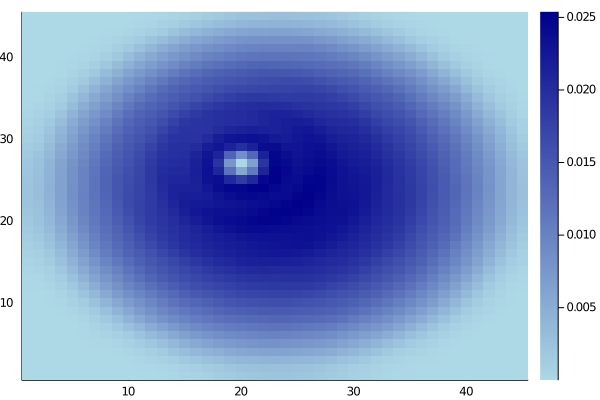

In [5]:
terms = [Kinetic(),
         ExternalFromReal(X -> pot(X...)),
         PowerNonlinearity(C, α),
         Magnetic(Apot),
]
model = Model(lattice; n_electrons=n_electrons,
              terms=terms, spin_polarization=:spinless)  # "spinless electrons"
basis = PlaneWaveBasis(model, Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-5)  # Reduce tol for production
heatmap(scfres.ρ.real[:, :, 1], c=:blues)